In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from yellowbrick.target import FeatureCorrelation
import matplotlib.pyplot as plt
import plotly.express as px

In [159]:
spotify_df = pd.read_csv("data/data.csv")
year_data = pd.read_csv("data/data_by_year.csv")
spotify_df.columns
spotify_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [160]:
spotify_df["year"] = pd.to_numeric(spotify_df["year"])

In [161]:
spotify_df = spotify_df.drop_duplicates(subset=["name", "artists"]).reset_index().drop('index', axis=1)
spotify_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### Data Exploration

##### Music Over Time

/Users/aditya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='decade', ylabel='count'>

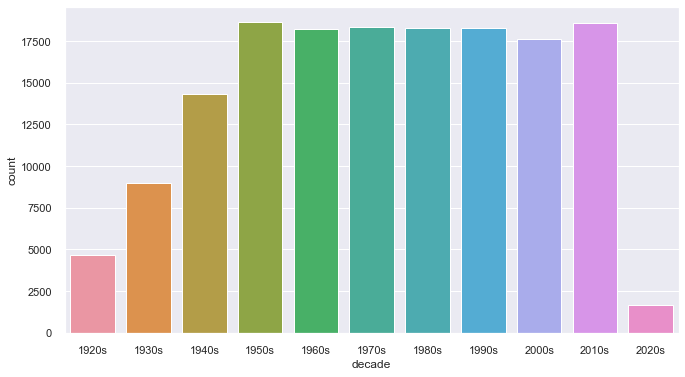

In [162]:
def get_decade(year):
    
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    
    return decade

spotify_df['decade'] = spotify_df['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(spotify_df['decade'])

<AxesSubplot:xlabel='year', ylabel='tempo'>

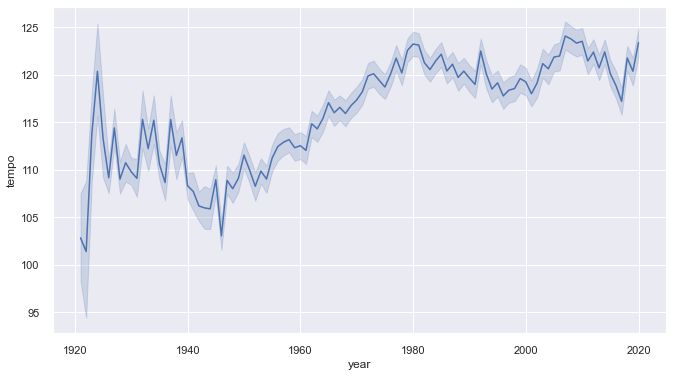

In [163]:
sns.lineplot(x='year', y='tempo', data=spotify_df)

Checking for the Feature Correlation by considering a few features 

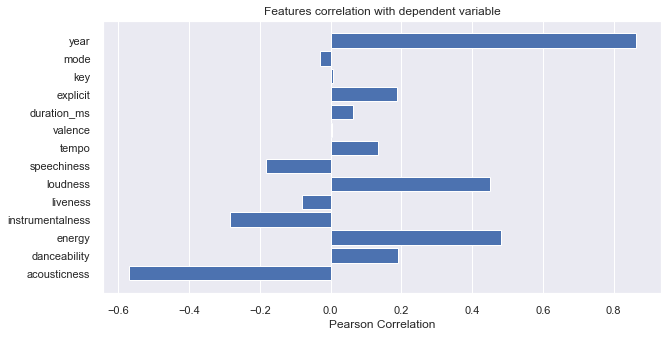

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [164]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = spotify_df[feature_names], spotify_df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(10,5)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [165]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
plt.rcParams['figure.figsize']=(8,5)
fig.show()

### Model Building

In [166]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [167]:
df_features = spotify_df[["id", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "year"]]
df_features.head()

,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year
0,4BJqT0PrAfrxzMOxytFOIz,0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366,80.954,0.0594,1921
1,7xPhfUan2yNtyFG0cUWkt8,0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150,60.936,0.9630,1921
2,1o6I8BglA6ylDMrIELygv1,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339,110.339,0.0394,1921
3,3ftBPsC5vPBKxYSee08FDH,0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354,100.109,0.1650,1921
4,4d6HGyGT8e121BsdKmw9v6,0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380,101.665,0.2530,1921


In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [169]:
df_features.index = df_features["id"]
df_features.drop('id', axis=1, inplace=True)
# X_scaled = scaler.fit_transform(df_features)
df_features['loudness'] = df_features['loudness']+60
df_features['loudness'] = df_features['loudness']/63.855
df_features['tempo'] = df_features['tempo']/244.091

/Users/aditya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v1/cr8s8tnj3jd2_c30fzmgmq300000gn/T/ipykernel_49658/4099832605.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v1/cr8s8tnj3jd2_c30fzmgmq300000gn/T/ipykernel_49658/4099832605.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [170]:
df_features.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,year
id,,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,0.982,0.279,0.211,0.878000,0.665,0.624916,0.0366,0.331655,0.0594,1921
7xPhfUan2yNtyFG0cUWkt8,0.732,0.819,0.341,0.000000,0.160,0.744797,0.4150,0.249645,0.9630,1921
1o6I8BglA6ylDMrIELygv1,0.961,0.328,0.166,0.913000,0.101,0.707071,0.0339,0.452040,0.0394,1921
3ftBPsC5vPBKxYSee08FDH,0.967,0.275,0.309,0.000028,0.381,0.793736,0.0354,0.410130,0.1650,1921
4d6HGyGT8e121BsdKmw9v6,0.957,0.418,0.193,0.000002,0.229,0.781521,0.0380,0.416505,0.2530,1921


In [171]:
model = NearestNeighbors(algorithm='kd_tree', n_neighbors=20)
model2 = NearestNeighbors(algorithm = 'brute', n_neighbors = 20)

We have made n_neighbors = 20. This essentially prepares us to give up to 20 different recommendations to our users!

In [172]:
sparse_mat_songs = csr_matrix(df_features.values)
mat_songs = np.array(df_features.values)

In [173]:
import timeit
# %%timeit
%timeit model.fit(mat_songs)
%timeit model2.fit(mat_songs)
#

106 ms ± 316 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
866 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [174]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
from data.spotify_keys import get_credentials
cid, secret = get_credentials()

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [175]:
def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['artists'] = [results['artists'][0]['name']]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value
    df_ret = pd.DataFrame(song_data)
    return df_ret[["artists", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "year"]]

In [193]:
def recommend(name, year, model, number_of_recommendations):
    #query = df_features.loc[id].to_numpy().reshape(1,-1)
    query = find_song(name, year).drop('artists', axis=1).to_numpy().reshape(1,-1)
    print('Searching for recommendations, please wait...')
    print('                            Recommendations                           ')
    print('----------------------------------------------------------------------')
    distances, indices = model.kneighbors(query,n_neighbors = number_of_recommendations)
    # print(distances)
    print(indices)
    try:
        for i in indices:
            print(spotify_df[['name','artists']].loc[i].where(spotify_df['name']!=name).dropna())
        %timeit model.kneighbors(query,n_neighbors = number_of_recommendations)
    except:
        print("Some songs not found in DB, will be updated soon")
        

In [177]:
def recommend2(name, year, model, number_of_recommendations):
    #query = df_features.loc[id].to_numpy().reshape(1,-1)
    query = find_song(name, year).drop('artists', axis=1).to_numpy().reshape(1,-1)
    print('Searching for recommendations, please wait...')
    print('                            Recommendations                           ')
    print('----------------------------------------------------------------------')
    distances, indices = model.kneighbors(query,n_neighbors = number_of_recommendations)
    # print(distances)
    print(indices)
    try:
        for i in indices:
            print(spotify_df[['name','artists']].loc[i].where(spotify_df['name']!=name).dropna())
        %timeit model.kneighbors(query,n_neighbors = number_of_recommendations)
    except:
        print("Some songs not found in DB, will be updated soon")

In [194]:
def test_recs():
    name = input('Enter song title: ')
    # print('Search results: ')
    # print(spotify_df[['artists','name']].where(spotify_df['name'] == name).dropna())

    # ind = int(input('Enter the index value of your desired song: '))
    # id = spotify_df['id'].loc[ind]
    year = int(input("Enter the year the song was released"))

    
    artists = find_song(name, year)["artists"]

    print('The inputted song selected is ', name, 'by', artists)

    num_recs = int(input('Enter number of recommendations: '))

    recommend(name, year, model, num_recs)

In [179]:
def test_recs2():
    name = input('Enter song title: ')
    # print('Search results: ')
    # print(spotify_df[['artists','name']].where(spotify_df['name'] == name).dropna())

    # ind = int(input('Enter the index value of your desired song: '))
    # id = spotify_df['id'].loc[ind]
    year = int(input("Enter the year the song was released"))

    
    artists = find_song(name, year)["artists"]

    print('The inputted song selected is ', name, 'by', artists)

    num_recs = int(input('Enter number of recommendations: '))

    recommend2(name, year, model2, num_recs)

In [195]:
test_recs()

The inputted song selected is  Lithium by 0    Nirvana
Name: artists, dtype: object
Searching for recommendations, please wait...
                            Recommendations                           
----------------------------------------------------------------------
[[ 48406  65754  96209 151855 152454]]
                                       name                  artists
48406                        Doowutchyalike  ['Digital Underground']
65754    Spin the Black Circle - Remastered            ['Pearl Jam']
96209      Everybody Knows (The River Song)          ['O.V. Wright']
151855  Surrender - 2005 Remastered Version              ['Suicide']
152454         I'm Leaving It All up to You         ['Dale & Grace']
487 µs ± 44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [157]:
test_recs2()

The inputted song selected is  Lithium by 0    Nirvana
Name: artists, dtype: object
Searching for recommendations, please wait...
                            Recommendations                           
----------------------------------------------------------------------
[[ 48406  65754  96209 151855 152454]]
                                       name                  artists
48406                        Doowutchyalike  ['Digital Underground']
65754    Spin the Black Circle - Remastered            ['Pearl Jam']
96209      Everybody Knows (The River Song)          ['O.V. Wright']
151855  Surrender - 2005 Remastered Version              ['Suicide']
152454         I'm Leaving It All up to You         ['Dale & Grace']
